In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Filtering
Modify an image by hovering a kernal over the image and combine their values.
### 1. **Average Filtering**
This takes a kernel of size m x n and will slide through the whole image and will replace the center pixel with the average of all the pixel values. The larger the kernel size the more blurred the image will appear.
### 2. **Median Filtering**
This will take a kernal, side through the image and will replace the median value of the considered pixels and will replace the middel value\

Median Filter is better in handlig Noise as the process will have no impact by random noises. But, Mean filter will take the noise into account while calculating the average this may give a value that is very far off.

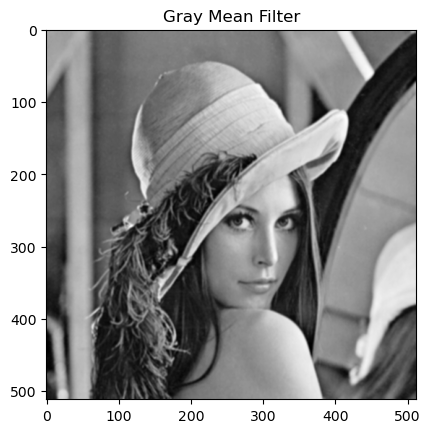

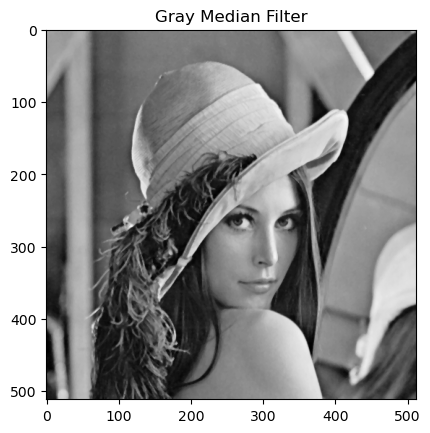

In [73]:
rgb_img = cv2.imread("images/lena.png", cv2.IMREAD_COLOR_RGB)
gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)

#Mean Filter
avg_img = cv2.blur(gray_img, (3,3))
plt.imshow(avg_img, cmap = "gray")
plt.title("Gray Mean Filter")
plt.show()

# Median Filter
median_img = cv2.medianBlur(gray_img, 3)
plt.imshow(median_img, cmap = "gray")
plt.title("Gray Median Filter")
plt.show()

### 3. **Sharpening**
Sharpen / increase the intensity of the sharp edges and textures.

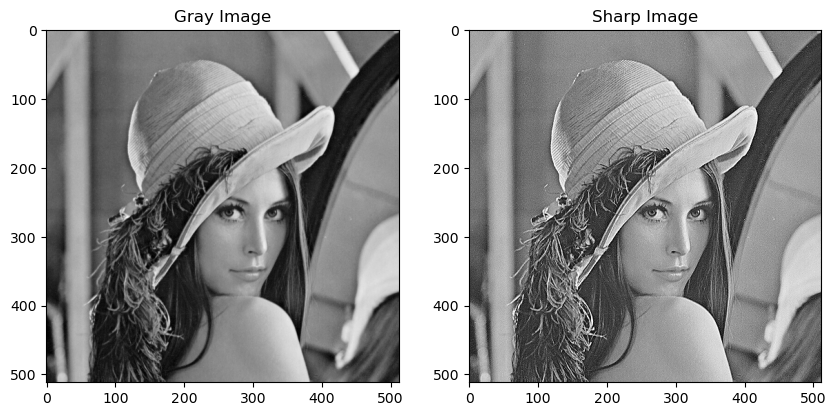

In [74]:
gray_img = cv2.imread("images/lena.png", cv2.IMREAD_GRAYSCALE)
sharp_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

sharp_img = cv2.filter2D(gray_img, -1, sharp_kernel)
plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.imshow(gray_img, cmap = "gray")
plt.title("Gray Image")
plt.subplot(1,2,2)
plt.imshow(sharp_img, cmap="gray")
plt.title("Sharp Image")
plt.show()

### 4. **Gaussian Blur**
The Gaussian filter works like a Mean filter, but instead of giving equal importance to all pixels, it applies a weighted average. The weights follow a 2D Gaussian curve: the center pixel has the highest weight, and the influence decreases with distance from the center. Both the kernel size and sigma (σ) control the filter’s behavior. A small sigma produces a slight blur, while a large sigma results in a stronger, more pronounced blur.

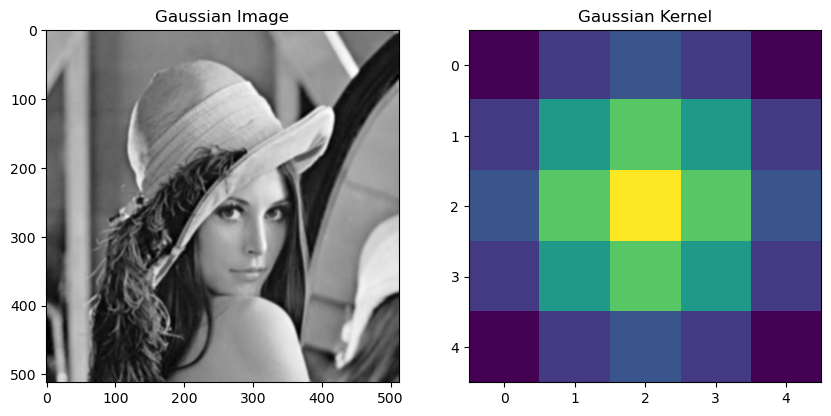

In [120]:
kernel_size = 5
sigma = 1.4
gaussian_img = cv2.GaussianBlur(gray_img, (kernel_size,kernel_size), sigma)

gaussian_kernel_1d = cv2.getGaussianKernel(kernel_size, sigma)
gaussian_kernel_2d = gaussian_kernel_1d @ gaussian_kernel_1d.T

plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.imshow(gaussian_img, cmap = "gray")
plt.title("Gaussian Image")
plt.subplot(1,2,2)
plt.imshow(gaussian_kernel_2d)
plt.title("Gaussian Kernel")
plt.show()

### 5. **Laplacian Filter**
The Laplacian filter is used to highlight edges and corners in an image. It is called as 2nd Derivative of Intensities
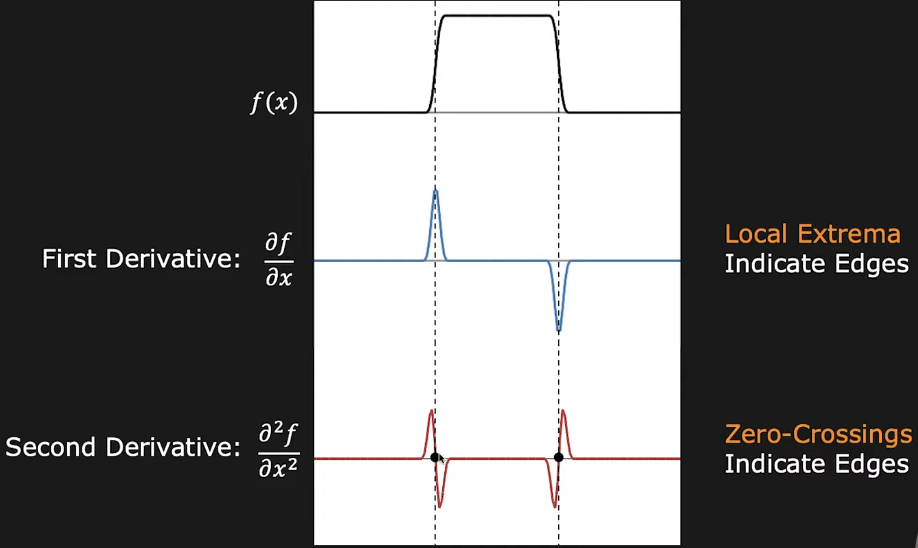\
- Typical kernels are [[0, -1, 0], [-1, 4, -1], [0, -1, 0]] (or) [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
- In flat regions, the center pixel is canceled out by its neighbors, resulting in values near zero. At edges or corners, where the center pixel differs significantly from its neighbors, the filter produces strong responses, making those features stand out.
- However, if the Laplacian is applied directly to a noisy image, it will also respond to small fluctuations, treating them as edges. To reduce this effect, Gaussian blurring is usually applied first, giving (G∗I) as the smoothed image. Then the Laplacian is applied: L∗(G∗I).
- Since convolution is commutative, this can be combined into a single operation: (L∗G)∗I, known as the Laplacian of Gaussian (LoG) filter if needed



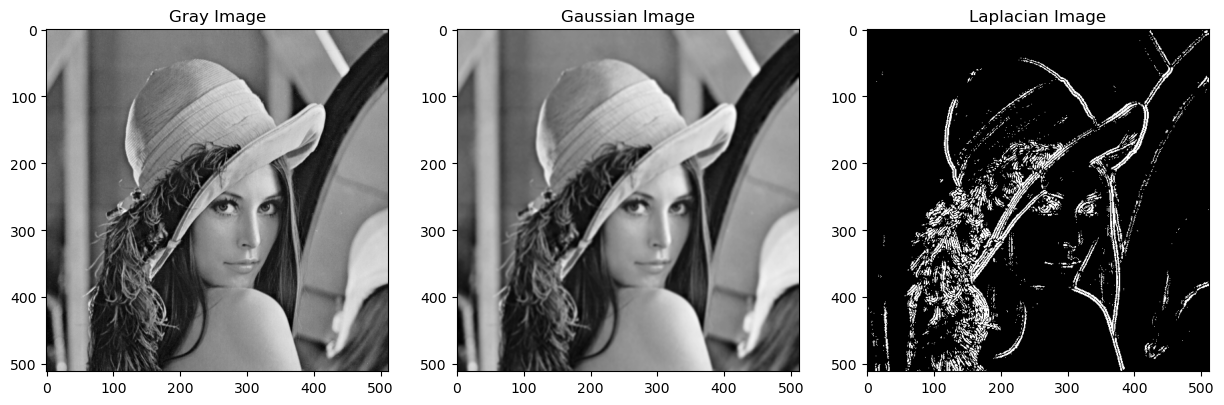

In [121]:
lap_img = cv2.Laplacian(gaussian_img, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(lap_img)
ret, thres_laplacian = cv2.threshold(laplacian, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


plt.figure(figsize=(15,20))
plt.subplot(1,3,1)
plt.imshow(gray_img, cmap = "gray")
plt.title("Gray Image")
plt.subplot(1,3,2)
plt.imshow(gaussian_img, cmap = "gray")
plt.title("Gaussian Image")
plt.subplot(1,3,3)
plt.imshow(thres_laplacian, cmap = "gray")
plt.title("Laplacian Image")
plt.show()

### 6. **BiLateral Filtering**\
It is an edge preserving de-noising filter. It is a weighted average of the neighbour pixels which takes both neighbour distance and the intensity into account\
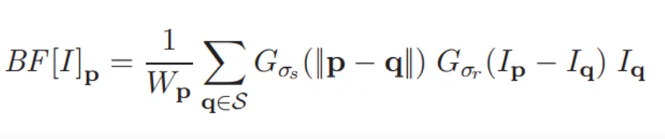\
Here W is the weight,
- G(sigma S)(p - q) is the spatial difference between current pixel and the neighbour pixel.\
- G(Sigma r)(Ip - Iq) is the intensity difference between the current pixel and the neighbout pixel.\

**Visual Representation of the Kernel**
![Screenshot from 2025-10-03 13-52-19.png](<attachment:Screenshot from 2025-10-03 13-52-19.png>)


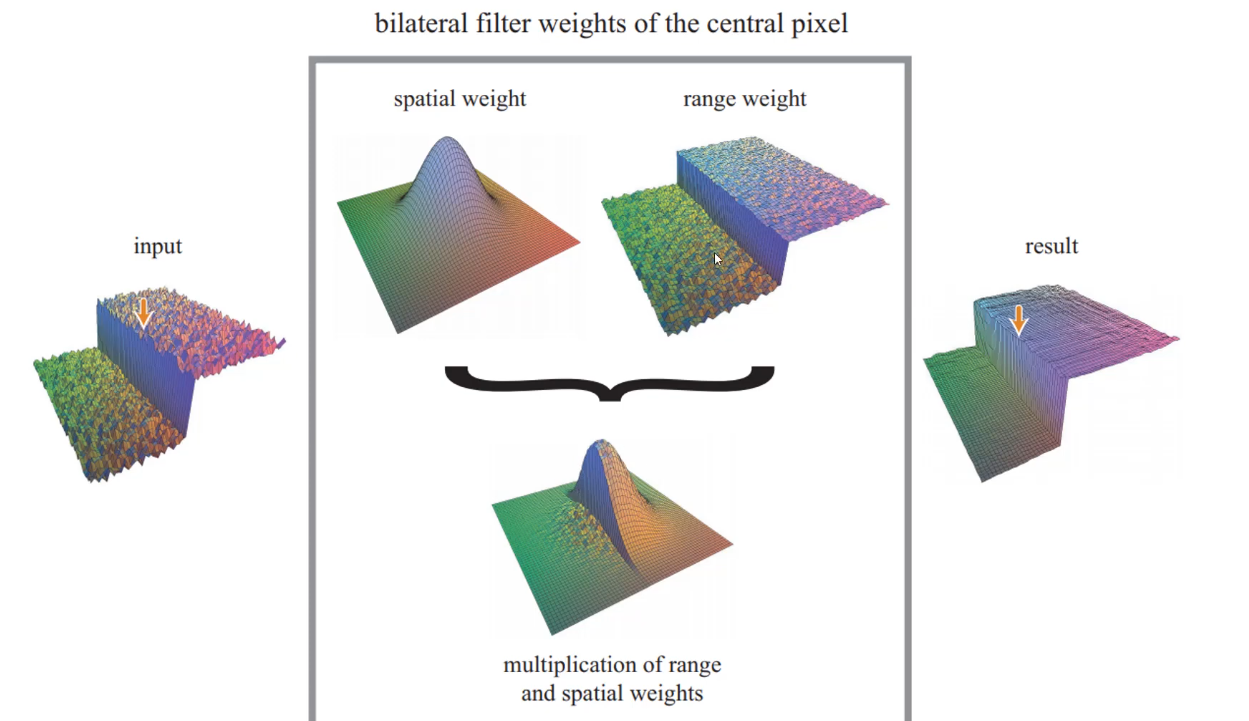

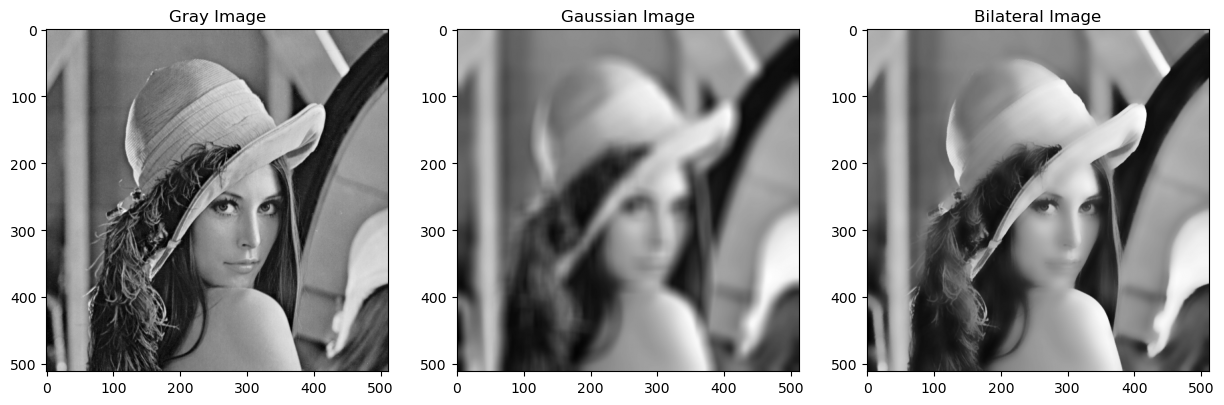

In [ ]:
gray_img = cv2.imread("images/lena.png", cv2.IMREAD_GRAYSCALE)
gaus_img = cv2.GaussianBlur(gray_img, (21,21), 50)
# Image, size of kernel, sigma for distance, sigma for intensity
bilateral_img = cv2.bilateralFilter(gray_img, 21, 50, 50)

plt.figure(figsize=(15,20))
plt.subplot(1,3,1)
plt.imshow(gray_img, cmap="gray")
plt.title("Gray Image")
plt.subplot(1,3,2)
plt.imshow(gaus_img, cmap="gray")
plt.title("Gaussian Image")
plt.subplot(1,3,3)
plt.imshow(bilateral_img, cmap="gray")
plt.title("Bilateral Image")
plt.show()